<a href="https://colab.research.google.com/github/pavansai26/TED-TALKS-DATA-ANALYSIS/blob/main/TED_TALKS_DATA_ANALYSYS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **problem statement**

# Analysing the Ted talk data

# **history of TED**

# Founded in 1984 by Richard Saulman as a non profit organisation that aimed at bringing experts from the fields of Technology, Entertainment and Design together, TED Conferences have gone on to become the Mecca of ideas from virtually all walks of life.

# As of 2015, TED and its sister TEDx chapters have published more than 2000 talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore, Jimmy Wales, Shahrukh Khan and Bill Gates.

# Ted, which operates under the slogan 'Ideas worth spreading' has managed to achieve an incredible feat of bringing world renowned experts from various walks of life and study and giving them a platform to distill years of their work and research into talks of 18 minutes in length.

# What's even more incredible is that their invaluable insights is available on the Internet for free.



# Since the time we have begun watching TED Talks, they have never ceased to amaze us. We have learned an incredible amount, about fields we were completely alien to, in the form of poignant stories, breathtaking visuals and subtle humor.

# So in this notebook, we are attempting at finding insights about the world of TED, its speakers and its viewers and try to answer a few questions.

# **Attribute Description**

# name: The official name of the TED Talk. Includes the title and the speaker.

#title: The title of the talk

#description: A blurb of what the talk is about.

#main_speaker: The first named speaker of the talk.

#speaker_occupation: The occupation of the main speaker.

#num_speaker: The number of speakers in the talk.

#duration: The duration of the talk in seconds.

#event: The TED/TEDx event where the talk took place.

#film_date: The Unix timestamp of the filming.

#published_date: The Unix timestamp for the publication of the talk on TED.com

#comments: The number of first level comments made on the talk.

#tags: The themes associated with the talk.

#languages: The number of languages in which the talk is available.

#ratings: A stringified dictionary of the various ratings given to the talk (inspiring, fascinating, jaw dropping, etc.)

#related_talks: A list of dictionaries of recommended talks to watch next.

#url: The URL of the talk.

#views: The number of views on the talk.

# **importing the necessary libraries**

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Plotting style**

In [2]:
sns.set_style("whitegrid")
sns.set_palette("muted")
plt.style.use("fivethirtyeight")

# **ignoring the warnings**

In [3]:
import warnings
warnings.filterwarnings('ignore',category = DeprecationWarning)
warnings.filterwarnings('ignore',category = UserWarning)
warnings.filterwarnings('ignore',category = RuntimeWarning)
warnings.filterwarnings('ignore',category = FutureWarning)

# **setting the no.of rows and columns**

In [4]:
pd.set_option('display.max_rows',100000)
pd.set_option('display.max_columns',1000)

# **accesing the drive**

In [5]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


# **Reading the Data**

In [37]:
df = pd.read_csv('/gdrive/My Drive/Colab Notebooks/TED analysis.csv')

# **printing the data only top 5**

In [38]:
df.head()

,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,comments,tags,languages,ratings,related_talks,url,views
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,Author/educator,1,1164,TED2006,25-02-2006,27-06-2006,4553,"['children', 'creativity', 'culture', 'dance',...",60,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,Al Gore: Averting the climate crisis,Averting the climate crisis,With the same humor and humanity he exuded in ...,Al Gore,Climate advocate,1,977,TED2006,25-02-2006,27-06-2006,265,"['alternative energy', 'cars', 'climate change...",43,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,David Pogue: Simplicity sells,Simplicity sells,New York Times columnist David Pogue takes aim...,David Pogue,Technology columnist,1,1286,TED2006,24-02-2006,27-06-2006,124,"['computers', 'entertainment', 'interface desi...",26,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,Majora Carter: Greening the ghetto,Greening the ghetto,"In an emotionally charged talk, MacArthur-winn...",Majora Carter,Activist for environmental justice,1,1116,TED2006,26-02-2006,27-06-2006,200,"['MacArthur grant', 'activism', 'business', 'c...",35,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,Hans Rosling: The best stats you've ever seen,The best stats you've ever seen,You've never seen data presented like this. Wi...,Hans Rosling,Global health expert; data visionary,1,1190,TED2006,22-02-2006,28-06-2006,593,"['Africa', 'Asia', 'Google', 'demo', 'economic...",48,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/hans_rosling_shows_t...,12005869


# **Which are the top 15 most viewed talks of all time**

In [8]:
pop_talks = df[['title', 'main_speaker', 'views', 'film_date']].sort_values('views', ascending=False)[:15]

pop_talks

,title,main_speaker,views,film_date
0,Do schools kill creativity?,Ken Robinson,47227110,25-02-2006
1346,Your body language may shape who you are,Amy Cuddy,43155405,26-06-2012
677,How great leaders inspire action,Simon Sinek,34309432,17-09-2009
837,The power of vulnerability,Brené Brown,31168150,06-06-2010
452,10 things you didn't know about orgasm,Mary Roach,22270883,06-02-2009
1776,How to speak so that people want to listen,Julian Treasure,21594632,10-06-2013
201,My stroke of insight,Jill Bolte Taylor,21190883,27-02-2008
5,Why we do what we do,Tony Robbins,20685401,02-02-2006
2114,This is what happens when you reply to spam email,James Veitch,20475972,08-12-2015
1416,"Looks aren't everything. Believe me, I'm a model.",Cameron Russell,19787465,27-10-2012


# **Observations:**

# 1)Ken Robinson's talk on Do Schools Kill Creativity? is the most popular TED Talk of all time with 47.2 million views.

# 2)Also coincidentally, it is also one of the first talks to ever be uploaded on the TED Site (the main dataset is sorted by published date).

# 3)Robinson's talk is closely followed by Amy Cuddy's talk on Your Body Language May Shape Who You Are. There are only 2 talks that have surpassed the 40 million mark and 4 talks that have crossed the 30 million mark.

# **creating a subset of the data, sorting the values according to 'views'**

In [9]:
df[['title', 'main_speaker', 'views', 'film_date']].sort_values('views', ascending=False)[:15]

,title,main_speaker,views,film_date
0,Do schools kill creativity?,Ken Robinson,47227110,25-02-2006
1346,Your body language may shape who you are,Amy Cuddy,43155405,26-06-2012
677,How great leaders inspire action,Simon Sinek,34309432,17-09-2009
837,The power of vulnerability,Brené Brown,31168150,06-06-2010
452,10 things you didn't know about orgasm,Mary Roach,22270883,06-02-2009
1776,How to speak so that people want to listen,Julian Treasure,21594632,10-06-2013
201,My stroke of insight,Jill Bolte Taylor,21190883,27-02-2008
5,Why we do what we do,Tony Robbins,20685401,02-02-2006
2114,This is what happens when you reply to spam email,James Veitch,20475972,08-12-2015
1416,"Looks aren't everything. Believe me, I'm a model.",Cameron Russell,19787465,27-10-2012


# **Let us make a bar chart to visualise these 15 talks in terms of the number of views they garnered.**

#  The first three letters of the first name of the speaker


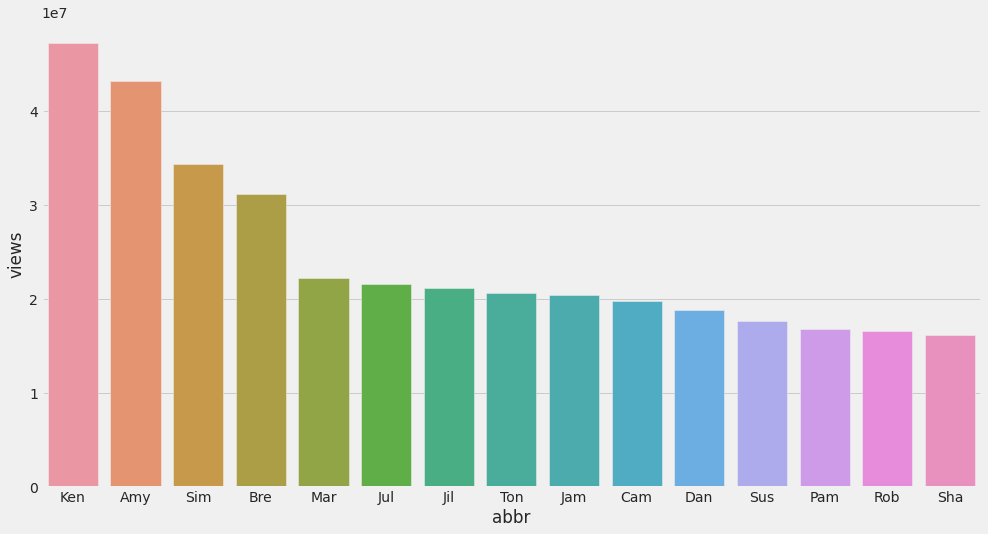

In [10]:
pop_talks['abbr'] = pop_talks['main_speaker'].apply(lambda x: x[:3])

plt.figure(figsize=(15,8))

sns.barplot(x='abbr', y='views', data=pop_talks)

In [11]:
pop_talks.head()

,title,main_speaker,views,film_date,abbr
0,Do schools kill creativity?,Ken Robinson,47227110,25-02-2006,Ken
1346,Your body language may shape who you are,Amy Cuddy,43155405,26-06-2012,Amy
677,How great leaders inspire action,Simon Sinek,34309432,17-09-2009,Sim
837,The power of vulnerability,Brené Brown,31168150,06-06-2010,Bre
452,10 things you didn't know about orgasm,Mary Roach,22270883,06-02-2009,Mar


# **distribution of views**

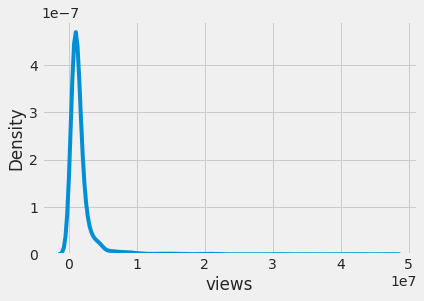

In [12]:
sns.distplot(df['views'],hist = False)

# **descriptive statics of views**

In [13]:
df['views'].describe()

count    2.550000e+03
mean     1.698297e+06
std      2.498479e+06
min      5.044300e+04
25%      7.557928e+05
50%      1.124524e+06
75%      1.700760e+06
max      4.722711e+07
Name: views, dtype: float64

# **observations**

# **The average number of views on TED Talks in 1.6 million**

# **the median number of views is 1.12 million** 

# **This suggests a very high average level of popularity of TED Talks**

# **We also notice that the majority of talks have views less than 4 million.**

# **descriptive statics of comments**

In [14]:
df['comments'].describe()

count    2550.000000
mean      191.562353
std       282.315223
min         2.000000
25%        63.000000
50%       118.000000
75%       221.750000
max      6404.000000
Name: comments, dtype: float64

# **observations**

# **On average, there are 191.5 comments on every TED Talk**

# **we can conclude that the TED Online Community is highly involved in discussions revolving TED Talks.**

# **There is a huge standard deviation associated with the comments.**

# **In fact, it is even larger than the mean suggesting that the measures may be sensitive to outliers**

# **The minimum number of comments on a talk is 2 and the maximum is 6404. The range is 6402.**

# **The minimum number, though, may be as a result of the talk being posted extremely recently.**

# distribution of comments

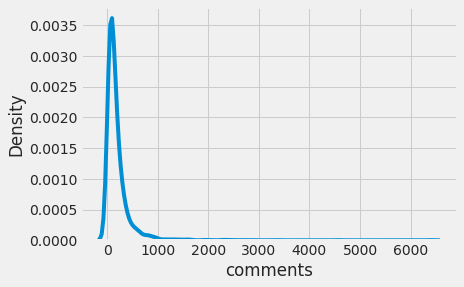

In [15]:
sns.distplot(df['comments'], hist=False)

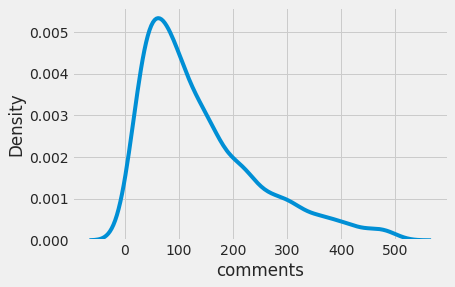

In [16]:
sns.distplot(df[df['comments'] < 500]['comments'],hist = False)

# Observations

# **From the plot above, we can see that the bulk of the talks have fewer than 500 comments.**

# **This clearly suggests that the mean obtained above has been heavily influenced by outliers. This is possible because the number of samples is only 2550 talks.**

# **co-relation between views and comments**

Text(0, 0.5, 'comments')

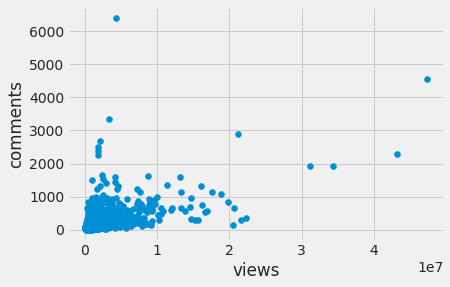

In [17]:
plt.scatter(x='views', y='comments', data=df)

plt.xlabel('views')

plt.ylabel('comments')

In [18]:
df[['views', 'comments']].corr()

,views,comments
views,1.000000,0.530939
comments,0.530939,1.000000


# **observations**

# As the scatterplot and the correlation matrix show, the pearson coefficient is slightly more than 0.5. This suggests a medium to strong correlation between the two quantities.

# **now check the number of views and comments on the 10 most commented TED Talks of all time.**

In [19]:
df[['title', 'main_speaker','views', 'comments']].sort_values('comments', ascending=False).head(10)

,title,main_speaker,views,comments
96,Militant atheism,Richard Dawkins,4374792,6404
0,Do schools kill creativity?,Ken Robinson,47227110,4553
644,Science can answer moral questions,Sam Harris,3433437,3356
201,My stroke of insight,Jill Bolte Taylor,21190883,2877
1787,How do you explain consciousness?,David Chalmers,2162764,2673
954,Taking imagination seriously,Janet Echelman,1832930,2492
840,On reading the Koran,Lesley Hazleton,1847256,2374
1346,Your body language may shape who you are,Amy Cuddy,43155405,2290
661,The danger of science denial,Michael Specter,1838628,2272
677,How great leaders inspire action,Simon Sinek,34309432,1930


# **observations**

# As can be seen above, Richard Dawkins' talk on Militant Atheism' generated the greatest amount of discussion and opinions despite having significantly lesser views than Ken Robinson's talk, which is second in the list. This raises some interesting questions which is what we want to explore further.

# **Which talks tend to attract the largest amount of discussion?**

# To answer this question, we will define a new feature discussion quotient which is simply the ratio of the number of comments to the number of views. We will then check which talks have the largest discussion quotient.



In [20]:
df['dis_quo'] = df['comments']/df['views']


In [21]:
df[['title', 'main_speaker','views', 'comments', 'dis_quo', 'film_date']].sort_values('dis_quo', ascending=False).head(10)


,title,main_speaker,views,comments,dis_quo,film_date
744,The case for same-sex marriage,Diane J. Savino,292395,649,0.002220,02-12-2009
803,E-voting without fraud,David Bismark,543551,834,0.001534,14-07-2010
96,Militant atheism,Richard Dawkins,4374792,6404,0.001464,02-02-2002
694,Inside a school for suicide bombers,Sharmeen Obaid-Chinoy,1057238,1502,0.001421,10-02-2010
954,Taking imagination seriously,Janet Echelman,1832930,2492,0.001360,03-03-2011
840,On reading the Koran,Lesley Hazleton,1847256,2374,0.001285,10-10-2010
876,Curating humanity's heritage,Elizabeth Lindsey,439180,555,0.001264,08-12-2010
1787,How do you explain consciousness?,David Chalmers,2162764,2673,0.001236,18-03-2014
661,The danger of science denial,Michael Specter,1838628,2272,0.001236,11-02-2010
561,Dance to change the world,Mallika Sarabhai,481834,595,0.001235,04-11-2009


# **Who are the top speakers?**

In [22]:
top_speakers = df.main_speaker.value_counts()[:10]


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

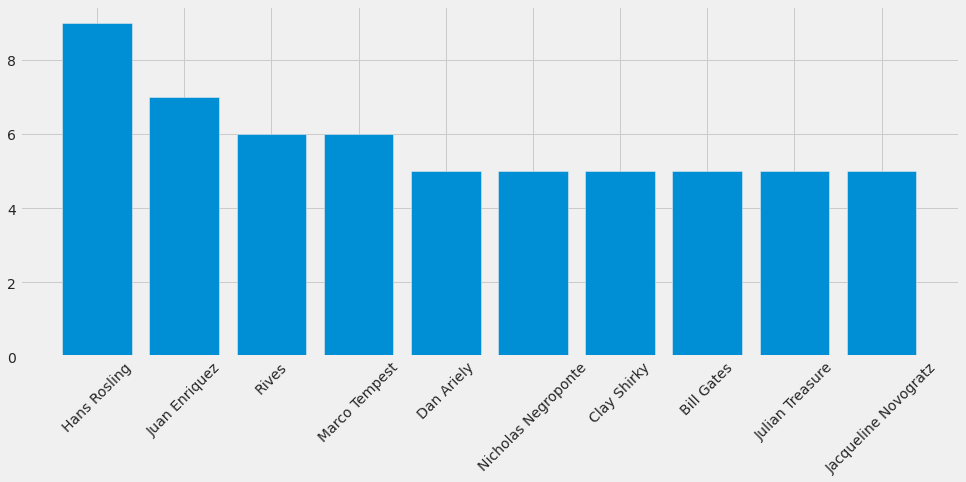

In [23]:
plt.figure(figsize=(15,6))

plt.bar(top_speakers.index,height=top_speakers)

plt.xticks(rotation=45)

# **observations**

# Hans Rosling, the Swiss Health Professor is clearly the most popular TED Speaker, with more than 9 appearances on the TED Forum. Juan Enriquez comes a close second with 7 appearances. Rives and Marco Tempest have graced the TED platform 6 times.


# **Which occupation should you choose if you want to become a TED Speaker? Let us have a look what kind of people TED is most interested in inviting to its events.**

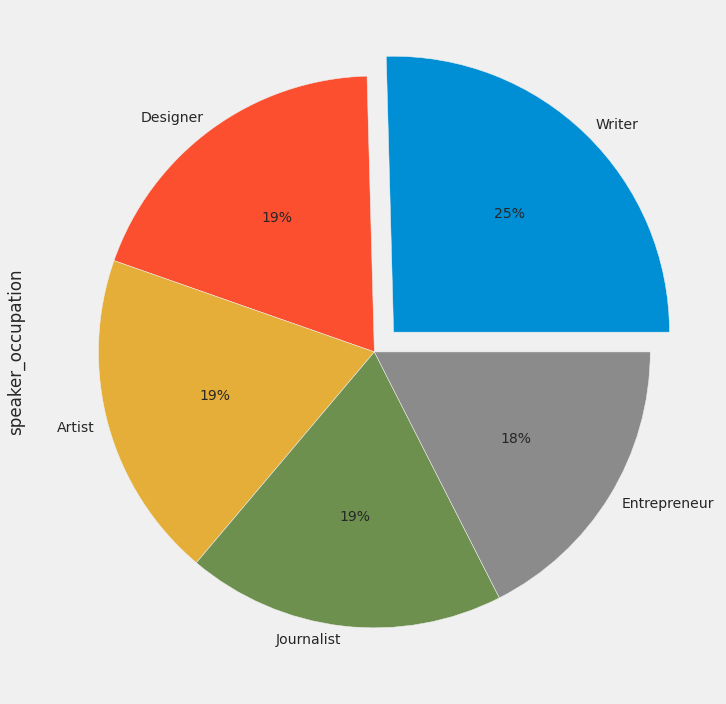

In [24]:
plt.figure(figsize=(15,10))

explode = (0.1, 0.0, 0.0, 0,0)

df['speaker_occupation'].value_counts()[:5].plot(kind='pie',explode=explode, autopct='%1.0f%%', labeldistance=1.05)

plt.tight_layout()

# **Observations**

# Writers are the most popular with more than 45 speakers identifying themselves as the aforementioned.


# Artists and Designers come a distant second with around 35 speakers in each category.


# This result must be taken with a pinch of salt as a considerable number of speakers identify themselves with multiple professions (for example, writer/entrepreneur).


# **some professions tend to attract a larger number of viewers?**

# To answer this question let us visualise the relationship between the top 10 most popular professions and the views thet garnered in the form of a box plot.



# Finding out the top 10 occupation


In [25]:
top_10_occupation_list = df['speaker_occupation'].value_counts()[:10].index.to_list()
top_10_occupation = df[df.speaker_occupation.isin(top_10_occupation_list)]


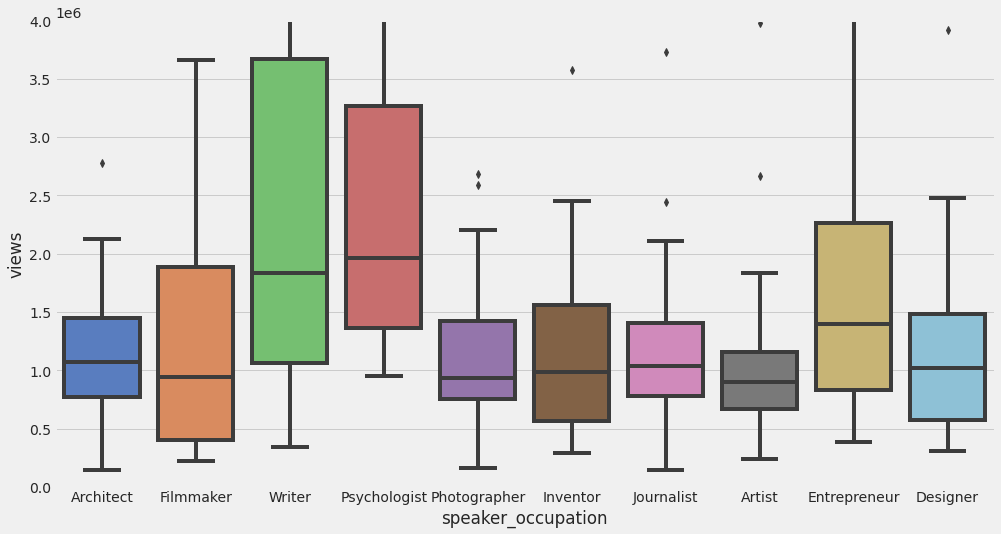

In [26]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15, 8))
sns.boxplot(x='speaker_occupation', y='views', data=top_10_occupation, palette="muted", ax =ax)
ax.set_ylim([0, 0.4e7])
plt.show()

# **observations**

# On average, out of the top 10 most popular professions, Psychologists tend to garner the most views. Writers have the greatest range of views between the first and the third quartile.


# **Convert the duration column in minutes**

In [40]:
df['duration'] = df['duration']/60
df.head()

,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,comments,tags,languages,ratings,related_talks,url,views
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,Author/educator,1,19.400000,TED2006,25-02-2006,27-06-2006,4553,"['children', 'creativity', 'culture', 'dance',...",60,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,Al Gore: Averting the climate crisis,Averting the climate crisis,With the same humor and humanity he exuded in ...,Al Gore,Climate advocate,1,16.283333,TED2006,25-02-2006,27-06-2006,265,"['alternative energy', 'cars', 'climate change...",43,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,David Pogue: Simplicity sells,Simplicity sells,New York Times columnist David Pogue takes aim...,David Pogue,Technology columnist,1,21.433333,TED2006,24-02-2006,27-06-2006,124,"['computers', 'entertainment', 'interface desi...",26,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,Majora Carter: Greening the ghetto,Greening the ghetto,"In an emotionally charged talk, MacArthur-winn...",Majora Carter,Activist for environmental justice,1,18.600000,TED2006,26-02-2006,27-06-2006,200,"['MacArthur grant', 'activism', 'business', 'c...",35,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,Hans Rosling: The best stats you've ever seen,The best stats you've ever seen,You've never seen data presented like this. Wi...,Hans Rosling,Global health expert; data visionary,1,19.833333,TED2006,22-02-2006,28-06-2006,593,"['Africa', 'Asia', 'Google', 'demo', 'economic...",48,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/hans_rosling_shows_t...,12005869


# **find the details of the longest and shortest Ted talks in terms of duration.**

# TED is famous for imposing a very strict time limit of 18 minutes. Although this is the suggested limit, there have been talks as short as 2 minutes and some have stretched to as long as 24 minutes. Let us get an idea of the distribution of TED Talk durations.

In [41]:
df['duration'].describe()

count    2550.000000
mean       13.775170
std         6.233486
min         2.250000
25%         9.616667
50%        14.133333
75%        17.445833
max        87.600000
Name: duration, dtype: float64

# **observations:**

# TED Talks, on average are 13.7 minutes long.

#  find this statistic surprising because TED Talks are often synonymous with 18 minutes and the average is a good 3 minutes shorter than that.

# The shortest TED Talk on record is 2.25 minutes long

# the longest talk is 87.6 minutes long

# **Let us look at the shortest talk.**

In [42]:
df[df['duration'] == 2.25]

,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,comments,tags,languages,ratings,related_talks,url,views
239,Murray Gell-Mann: The ancestor of language,The ancestor of language,After speaking at TED2007 on elegance in physi...,Murray Gell-Mann,Physicist,1,2.25,TED2007,03-03-2007,11-06-2008,76,"['culture', 'global issues', 'history', 'langu...",61,"[{'id': 22, 'name': 'Fascinating', 'count': 78...","[{'id': 161, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/murray_gell_mann_on_...,785293


# **Let us look at the longest talk.**

In [43]:
df[df['duration'] == 87.6]

,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,comments,tags,languages,ratings,related_talks,url,views
640,"Douglas Adams: Parrots, the universe and every...","Parrots, the universe and everything","Blind river dolphins, reclusive lemurs, a parr...",Douglas Adams,"Author, satirist",1,87.6,University of California,16-05-2001,16-03-2010,101,"['biodiversity', 'biology', 'comedy', 'humor',...",0,"[{'id': 22, 'name': 'Fascinating', 'count': 29...","[{'id': 635, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/douglas_adams_parrot...,473220
